In [73]:
import xarray as xr

#loading both the dataset of input and target variables
era5_ds = xr.open_dataset(r"C:\Users\Ankit\Downloads\merged_era5_2015_2016.nc")

In [74]:
print(era5_ds.data_vars)

Data variables:
    t2m      (valid_time, latitude, longitude) float32 16MB ...
    d2m      (valid_time, latitude, longitude) float32 16MB ...
    u10      (valid_time, latitude, longitude) float32 16MB ...
    v10      (valid_time, latitude, longitude) float32 16MB ...
    tp       (valid_time, latitude, longitude) float32 16MB ...


In [80]:
import os

file_path =r"C:\Users\Ankit\Downloads\merged_era5_2015_2016.nc"

size_bytes = os.path.getsize(file_path)
size_mb = size_bytes / (1024 * 1024)

print(f"File size: {size_mb:.2f} MB")

File size: 37.90 MB


In [81]:
for var in era5_ds.data_vars:
    print(f"{var}: {ds[var].dtype}")

t2m: float32
d2m: float32
u10: float32
v10: float32
tp: float32


In [52]:
era5_ds.isnull().sum()

<xarray.Dataset> Size: 28B
Dimensions:  ()
Coordinates:
    number   int64 8B ...
Data variables:
    t2m      int32 4B 0
    d2m      int32 4B 0
    u10      int32 4B 0
    v10      int32 4B 0
    tp       int32 4B 0

In [53]:
import numpy as np 
print(np.unique(era5_ds['t2m'].values))
print(np.unique(era5_ds['d2m'].values))
print(np.unique(era5_ds['u10'].values))
print(np.unique(era5_ds['v10'].values))
print(np.unique(era5_ds['tp'].values))

[232.55574 233.83954 234.02278 ... 317.73022 317.75854 318.03003]
[214.52512 214.99782 215.08583 ... 303.58813 303.95728 304.25415]
[-9.634323  -9.632675  -9.626221  ...  9.1466675  9.156311   9.164124 ]
[-8.777985  -8.6041565 -8.562668  ...  8.781113   8.927521   9.072845 ]
[0.0000000e+00 2.3841858e-07 4.7683716e-07 ... 4.9267769e-02 5.1682472e-02
 5.6596756e-02]


In [54]:
for v in np.unique(era5_ds['tp'].values):
    print(v)

0.0
2.3841858e-07
4.7683716e-07
7.1525574e-07
9.536743e-07
1.1920929e-06
1.4305115e-06
1.66893e-06
1.9073486e-06
2.1457672e-06
2.3841858e-06
2.861023e-06
3.0994415e-06
3.33786e-06
3.5762787e-06
3.8146973e-06
4.053116e-06
4.2915344e-06
4.7683716e-06
5.2452087e-06
5.722046e-06
6.198883e-06
6.4373016e-06
6.67572e-06
6.914139e-06
7.1525574e-06
7.6293945e-06
7.867813e-06
8.106232e-06
8.583069e-06
9.059906e-06
9.298325e-06
9.536743e-06
1.001358e-05
1.04904175e-05
1.0967255e-05
1.1444092e-05
1.1920929e-05
1.2397766e-05
1.2874603e-05
1.3113022e-05
1.335144e-05
1.3828278e-05
1.4066696e-05
1.4305115e-05
1.4543533e-05
1.4781952e-05
1.5258789e-05
1.5497208e-05
1.5735626e-05
1.6212463e-05
1.66893e-05
1.7166138e-05
1.7642975e-05
1.8119812e-05
1.859665e-05
1.9073486e-05
1.9550323e-05
2.002716e-05
2.0503998e-05
2.0742416e-05
2.0980835e-05
2.1457672e-05
2.169609e-05
2.193451e-05
2.2411346e-05
2.2888184e-05
2.3126602e-05
2.336502e-05
2.3841858e-05
2.4318695e-05
2.4795532e-05
2.527237e-05
2.5749207e-05
2

In [55]:
#converting m to mm
era5_ds['tp'] = era5_ds['tp']* 1000

In [56]:
for v in np.unique(era5_ds['tp'].values):
    print(v)

0.0
0.00023841858
0.00047683716
0.00071525574
0.0009536743
0.0011920929
0.0014305115
0.00166893
0.0019073486
0.0021457672
0.0023841858
0.002861023
0.0030994415
0.00333786
0.0035762787
0.0038146973
0.004053116
0.0042915344
0.0047683716
0.0052452087
0.005722046
0.006198883
0.0064373016
0.00667572
0.006914139
0.0071525574
0.0076293945
0.007867813
0.008106232
0.008583069
0.009059906
0.009298325
0.009536743
0.01001358
0.0104904175
0.010967255
0.011444092
0.011920929
0.012397766
0.012874603
0.013113022
0.01335144
0.013828278
0.014066696
0.014305115
0.014543533
0.014781952
0.015258789
0.015497208
0.015735626
0.016212463
0.0166893
0.017166138
0.017642975
0.018119812
0.01859665
0.019073486
0.019550323
0.02002716
0.020503998
0.020742416
0.020980835
0.021457672
0.02169609
0.02193451
0.022411346
0.022888184
0.023126602
0.02336502
0.023841858
0.024318695
0.024795532
0.02527237
0.025749207
0.026226044
0.02670288
0.027179718
0.027418137
0.027656555
0.028133392
0.02861023
0.029087067
0.029563904
0.030

In [57]:
#converting kelvin to celsius
era5_ds['t2m'] = era5_ds['t2m'] - 273.15
era5_ds['d2m'] = era5_ds['d2m'] - 273.15

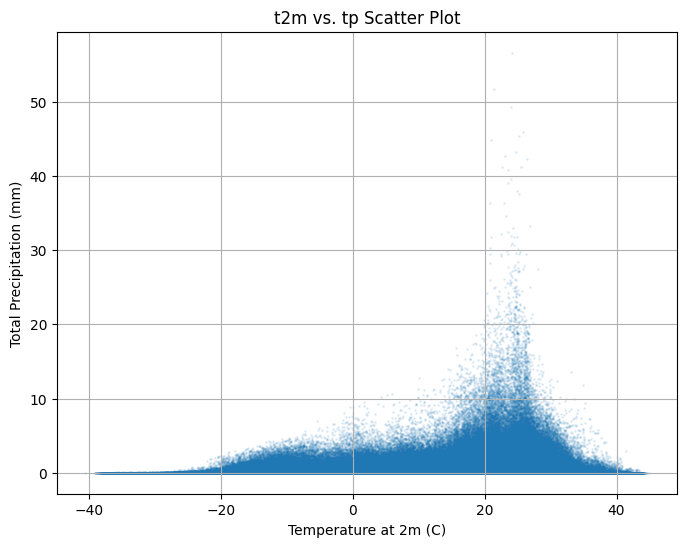

In [58]:
#plotting t2m against tp !
import matplotlib.pyplot as plt

# Flatten data and remove NaNs
t2m_Clean= era5_ds['t2m'].values.flatten()
tp_clean = era5_ds['tp'].values.flatten()

plt.figure(figsize=(8,6))
plt.scatter(t2m_Clean, tp_clean, alpha=0.1, s=1) #alpha=0.1 is usefull when you have alot of overlapping points as you can see in the plot
#s=1 , is the size of the point s=20 means very large points
plt.xlabel("Temperature at 2m (C)")
plt.ylabel("Total Precipitation (mm)")
plt.title("t2m vs. tp Scatter Plot")
plt.grid(True)
plt.show()

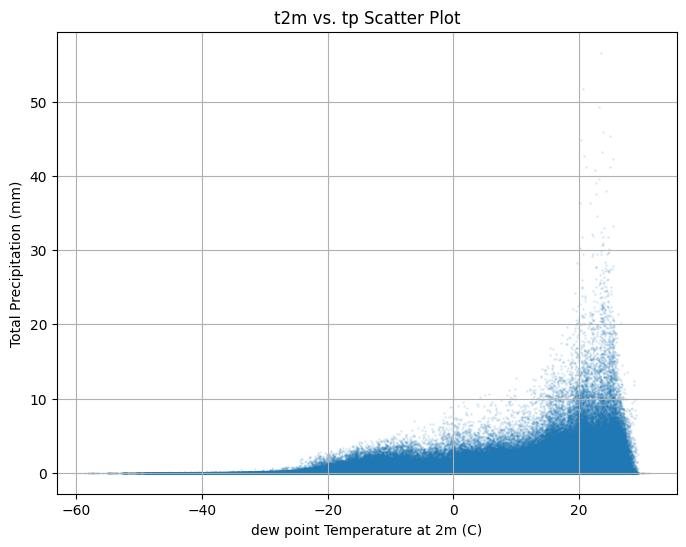

In [59]:
#plotting d2m against tp !
import matplotlib.pyplot as plt

# Flatten data and remove NaNs
d2m_cleaned = era5_ds['d2m'].values.flatten()
tp_cleaned = era5_ds['tp'].values.flatten()

plt.figure(figsize=(8,6))
plt.scatter(d2m_cleaned, tp_cleaned, alpha=0.1, s=1)
plt.xlabel("dew point Temperature at 2m (C)")
plt.ylabel("Total Precipitation (mm)")
plt.title("t2m vs. tp Scatter Plot")
plt.grid(True)
plt.show()

In [60]:
#theres no as such outliers, 
#and also for lstm models, we need to keep outliers to have all the patterns understanding !

In [61]:
print(np.unique(era5_ds['t2m'].values))
print(np.unique(era5_ds['d2m'].values))

[-40.594254 -39.310455 -39.127213 ...  44.58023   44.60855   44.880035]
[-58.624878 -58.152176 -58.064163 ...  30.43814   30.807281  31.104156]


In [63]:
output_path = r"C:\Users\Ankit\Downloads\cleaned_era5_2015_2016.nc"
era5_ds.to_netcdf(output_path)
print(f"✅ Saved cleaned dataset to: {output_path}")

✅ Saved cleaned dataset to: C:\Users\Ankit\Downloads\cleaned_era5_2015_2016.nc


In [65]:
ds = xr.open_dataset(r"C:\Users\Ankit\Downloads\cleaned_era5_2015_2016.nc")

In [78]:
import os

file_path = r"C:\Users\Ankit\Downloads\cleaned_era5_2015_2016.nc"

size_bytes = os.path.getsize(file_path)
size_mb = size_bytes / (1024 * 1024)

print(f"File size: {size_mb:.2f} MB")

File size: 64.11 MB


In [77]:
for var in ds.data_vars:
    print(f"{var}: {ds[var].dtype}")

t2m: float32
d2m: float32
u10: float32
v10: float32
tp: float32


In [86]:
#the size differs of two reasons !!
#the change in dtype
#2nd one is , the .nc file is not compresssed
#so in this case , it wasnt compressed therefore the size goes to 64 
import xarray as xr

ds = xr.open_dataset(r"C:\Users\Ankit\Downloads\cleaned_era5_2015_2016.nc")

# Prepare compression and dtype settings
encoding = {
    var: {"zlib": True, "complevel": 4, "dtype": "float32"}
    for var in ds.data_vars
}

# Save with compression
ds.to_netcdf(r"C:\Users\Ankit\Downloads\compressed_cleaned_era5_2015_2016.nc", encoding=encoding)